In [1]:

from matplotlib import pyplot as plt
import os
import numpy as np
import glob
import os

## astropy
import astropy.units as u
from astropy.table import Table


## ctapipe
from ctapipe_io_nectarcam import NectarCAMEventSource 
from ctapipe.io import event_source, EventSeeker

import scipy.stats as scsp
from scipy.stats import poisson                                                                                                             


#import seaborn as sns

chan=0

plt.rcParams['figure.figsize'] = [15, 7]

/local/home/ttaverni/anaconda3/envs/nectarchain-dev/lib/python3.7/site-packages/corsikaio/subblocks/dtypes.py:20: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  return np.dtype(dict(**dt))


In [2]:
        #MC_file_path ='/media/ttaverni/Transcend/MC_s/Heide/nsb0_thrs0_new_notes.simtel.gz'
        #MC_file_path = '/media/ttaverni/Transcend/MC_s/Heide/nsb125_thrs0_new_notes.simtel.gz'
        #MC_file_path = '/media/ttaverni/Transcend/MC_s/Heide/nsb250_thrs0_new_notes.simtel.gz'
        #MC_file_path = '/media/ttaverni/Transcend/MC_s/Heide/nsb500_thrs0_new_notes.simtel.gz'
        MC_file_path = '/media/ttaverni/Transcend/MC_s/Heide/nsb500_thrs0_new_notes_large-stat.simtel.gz'
        
        inputfile_reader = event_source(
            input_url = MC_file_path,
            max_events=1000)

        all_wfs = []
        for ii, event in enumerate(inputfile_reader):
            all_wfs.append(event.r0.tel[1].waveform[chan][:400])
        wfs_MC = np.array(all_wfs)

In [3]:
        ## NSB = 0 : 
        #data_file_path = '/media/ttaverni/Transcend/data/dataR1/NectarCAM.Run1533.000[0-9].fits.fz'
        ## NSB ~= 125 MHz (?) : 
        #data_file_path = '/media/ttaverni/Transcend/data/dataR1/NectarCAM.Run1538.000[0-9].fits.fz'
        ## NSB <~= 250 MHz (?) : 
        #data_file_path = '/media/ttaverni/Transcend/data/dataR1/NectarCAM.Run1539.000[0-9].fits.fz'
        ## NSB <= 500 MHz (?) : 
        data_file_path = '/media/ttaverni/Transcend/data/dataR1/NectarCAM.Run1542.000[0-9].fits.fz'
        
        
        inputfile_reader = NectarCAMEventSource(
            input_url = data_file_path,
            max_events=10000)

        cfg = inputfile_reader.camera_config
        pix_ids = cfg.expected_pixels_id[:400]
        
        all_wfs = []
        for ii, event in enumerate(inputfile_reader):
            all_wfs.append(event.r0.tel[event.r0.tels_with_data[0]].waveform[chan,pix_ids])
            if ii > len(wfs_MC)-3 : 
                break
        wfs_data = np.array(all_wfs)

In [4]:
wfs_myMC = np.load("../perfs/myMC_wfs.npy") - 29
#wfs_myMC = np.load("../perfs/myMC_wfs_gauss.npy") - 29
#wfs_myMC = np.load("../perfs/myMC_wfs_Test.npy") - 29 

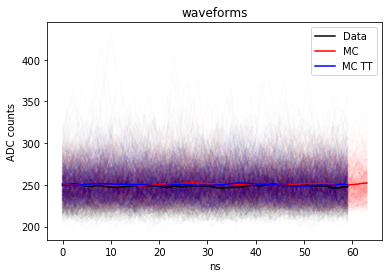

In [5]:
Nwfs_max = 500

p = plt.plot(wfs_data[:Nwfs_max,3,:].T,color='black',alpha=.01)
p = plt.plot(wfs_MC[:Nwfs_max,0,:].T,color='red',alpha=.01)
p = plt.plot(wfs_myMC[:Nwfs_max,:].T,color='blue',alpha=.01)

l = plt.gca().set_xlabel("ns")
l = plt.gca().set_ylabel("ADC counts")
t = plt.gca().set_title('waveforms')



p = plt.plot(wfs_data[:Nwfs_max,7,:].mean(axis=0),color='black',alpha=1, label='Data')
p = plt.plot(wfs_MC  [:Nwfs_max,0,:].mean(axis=0),color='red'  ,alpha=1, label = 'MC')
p = plt.plot(wfs_myMC[:Nwfs_max,:].mean(axis=0)  ,color='blue' ,alpha=1, label = 'MC TT')
l = plt.legend()

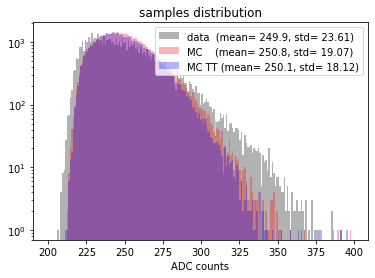

In [6]:
h1pix_data = wfs_data[:,4,:].flatten()
h1pix_MC   = wfs_MC[:,0,:].flatten()

n,b,p = plt.hist(h1pix_data,bins=np.arange(200,400,1),color='black', \
                 label='data  (mean= {:.4}, std= {:.4})'.format(h1pix_data.mean(),h1pix_data.std()), alpha=.3)
n,b,p = plt.hist(h1pix_MC,bins=np.arange(200,400,1),color='red', \
                 label='MC    (mean= {:.4}, std= {:.4})'.format(h1pix_MC.mean(),  h1pix_MC.std()),   alpha=.3)

n,b,p = plt.hist(wfs_myMC[:len(wfs_MC)].flatten(),bins=np.arange(200,400,1),color='blue', \
                 label='MC TT (mean= {:.4}, std= {:.4})'.format(wfs_myMC.mean(),  wfs_myMC.std()),   alpha=.3)

l = plt.legend()
l = plt.gca().set_xlabel("ADC counts")
t = plt.gca().set_title('samples distribution')
plt.gca().set_yscale('log')

In [7]:
wfs_data.mean()

248.8363562729396

In [8]:
wfs_MC.mean()

249.998692578125

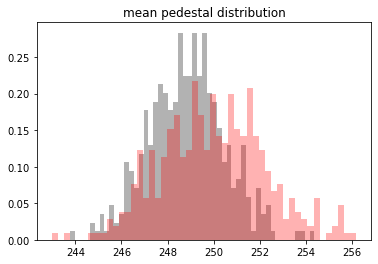

In [9]:
n,b,p = plt.hist(wfs_data.mean(axis=(0,2)),50,color='black', density=1, alpha=.3)
n,b,p = plt.hist(  wfs_MC.mean(axis=(0,2)),50,color='red',   density=1, alpha=.3)
t = plt.gca().set_title('mean pedestal distribution')

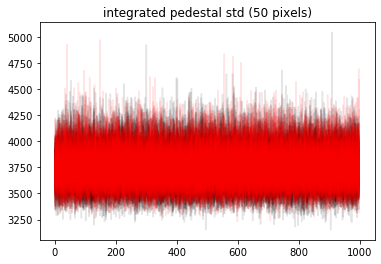

In [10]:
## integrated pedestal std

imin = 15
imax = 30
p = plt.plot(wfs_data[:,:50,imin:imax].sum(axis=2),color='black',alpha=.1)
p = plt.plot(wfs_MC[:,:50,imin:imax].sum(axis=2),color='red',alpha=.1)

t = plt.gca().set_title('integrated pedestal std (50 pixels)')

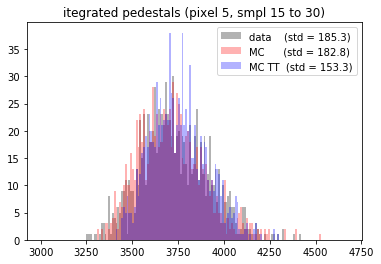

In [11]:
pixsmax = 200
pix = 5

p_std_data = wfs_data[:,pix,imin:imax].sum(axis=1).flatten()
p_std_MC = wfs_MC[:,pix,imin:imax].sum(axis=1).flatten()
p_std_myMC = wfs_myMC[:len(wfs_MC),imin:imax].sum(axis=1)

hmin = round((imax-imin)*250-4*p_std_data.std())
hmax = round((imax-imin)*250+5*p_std_data.std())
pas =10

p = plt.hist(p_std_data ,\
             bins=np.arange(hmin,hmax,pas), color='black', alpha=.3,\
             label='data    (std = {:.4})'.format(p_std_data.std()))

p = plt.hist(p_std_MC,\
             bins=np.arange(hmin,hmax,pas), color='red',   alpha=.3,\
             label='MC      (std = {:.4})'.format(p_std_MC.std()))

p = plt.hist(  p_std_myMC,\
             bins=np.arange(hmin,hmax,pas), color='blue',   alpha=.3,\
             label='MC TT  (std = {:.4})'.format(p_std_myMC.std()))

l = plt.gca().set_title('itegrated pedestals (pixel {}, smpl {} to {})'.format(pix,imin,imax))
l = plt.gca().legend()


In [12]:
p_std_myMC.shape

(1000,)

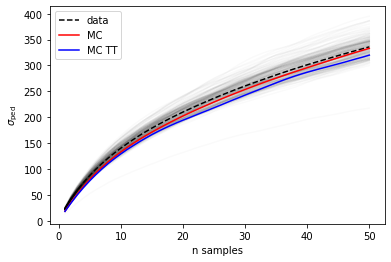

In [13]:
mnf = 50
data_nf = np.array([wfs_data[:,:pixsmax,10:11+ii].sum(axis=2) for ii in range(mnf)])
MC_nf   = np.array([  wfs_MC[:,:pixsmax,10:11+ii].sum(axis=2) for ii in range(mnf)])
myMC_nf = np.array([wfs_myMC[:,10:11+ii].sum(axis=1) for ii in range(mnf)])

#sdt_1spl    = wfs_data[:,:pixsmax,:].std(axis=(0,2)).mean()
#sdt_1spl_MC =   wfs_MC[:,:pixsmax,:].std(axis=(0,2)).mean()
#wfs_gauss = np.array([ np.array([np.random.normal(250,sdt_1spl_MC,60) for ii in range(200)] ) for wf in wfs_MC])
#gauss_nf  = np.array([  wfs_gauss[:,:pixsmax,10:11+ii].sum(axis=2) for ii in range(mnf)])
#plt.plot(range(50),data_nf.std(axis=1),color='black',alpha=.05)
#plt.plot(range(50),  MC_nf.std(axis=1),color='red',  alpha=.05)
smpl_array = np.arange(1,mnf+1,1)


plt.plot(smpl_array ,  data_nf.std(axis=1),'-', color='black',  alpha=.02)
plt.plot(smpl_array ,  data_nf.std(axis=1).mean(axis=1),'--', color='black',  alpha=1,label='data')
plt.plot(smpl_array ,  MC_nf.std(axis=1).mean(axis=1)       , color='red'  ,  alpha=1,label='MC')
plt.plot(smpl_array ,  myMC_nf.std(axis=1)                  , color='blue'  ,  alpha=1,label='MC TT')

#plt.plot(smpl_array ,  gauss_nf.std(axis=1).mean(axis=1)    , color='green',  alpha=1,label='gaussian')
#plt.plot(smpl_array ,  sdt_1spl_MC * smpl_array**.5, ':'    , color='blue' ,  alpha=1 , \
#         label = '$2.8 \sqrt{n_\mathrm{smpl}}$')
#plt.gca().set_yscale('log')
#plt.gca().set_xscale('log')

plt.gca().set_xlabel('n samples')
plt.gca().set_ylabel('$\sigma_\mathrm{ped}$')
l = plt.legend()

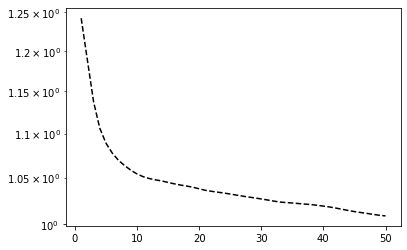

In [14]:
#plt.plot(smpl_array ,  data_nf.std(axis=1).mean(axis=1) ,'--', color='black',  alpha=1,label='data')
plt.plot(smpl_array ,  data_nf.std(axis=1).mean(axis=1)/MC_nf.std(axis=1).mean(axis=1),'--', color='black',  alpha=1,label='data')

plt.gca().set_yscale('log')
#plt.gca().set_xscale('log')

In [15]:
#n,b,p = plt.hist(np.max(wfs_data[:,0,:],axis=1),20,alpha=.4) 
#n,b,p = plt.hist(np.max(  wfs_MC[:,0,:],axis=1),20,alpha=.4)
#n,b,p = plt.hist(np.max(wfs_data[:,:pixsmax,:]- wfs_data[:,:pixsmax,:].mean(),axis=0).flatten()/14.,100, \
#                 color='black', alpha=.4) 
#n,b,p = plt.hist(np.max(  wfs_MC[:,:pixsmax,:]- wfs_MC[:,:pixsmax,:].mean(),axis=0).flatten()/14.,100, \
#                 color='red'  , alpha=.4)
#plt.gca().set_yscale('log')

In [16]:
#        inputfile_reader = NectarCAMEventSource(
#            input_url = data_file_path,
#            max_events=2000)
#        all_wfs = []
#        for ii, event in enumerate(inputfile_reader):
#            all_wfs.append(event.r0.tel[event.r0.tels_with_data[0]].waveform[chan,pix_ids])
#            
#        all_wfs_data = np.array(all_wfs)

In [17]:

        #pp = poisson(.25)
        #rn_wfs_data  = all_wfs_data[:,:,:]- all_wfs_data[:,:,:].mean(axis=0)
        #rn_wfs_MC    = wfs_MC[:,:,:60]    -     wfs_MC[:,:,:60].mean(axis=0)
        #tt = pp.pmf( np.round((rn_wfs_data.max(axis=2)/14 ).flatten())) * len(rn_wfs_data.flatten())
        #tt2 = pp.pmf( np.round((rn_wfs_MC.max(axis=2)/14 ).flatten())) * len(rn_wfs_MC.flatten())
        
        #print(len(rn_wfs_data.flatten()))
        #logbins = np.logspace(-30,0,20)
        #n,b,p = plt.hist(tt,bins=logbins, \
        #         color='black', alpha=.4, label = 'data') 
        #n,b,p = plt.hist(tt2,bins=logbins, \
        #         color='red'  , alpha=.4,label = 'MC')
        
        #plt.gca().set_yscale('log')
        #plt.gca().set_xscale('log')
        #plt.gca().set_xlabel('Charge (p.e.)')
        #plt.gca().set_title('NSB+afterpulse specrum')
        #l=plt.gca().legend()

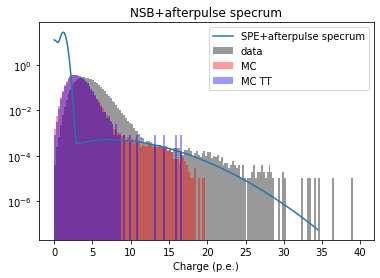

In [18]:

        all_wfs_data = wfs_data
        rn_wfs_data  = all_wfs_data[:,:,:] - all_wfs_data[:,:,:].mean(axis=0)
        rn_wfs_MC    = wfs_MC[:,:,:60]     -     wfs_MC[:,:,:60].mean(axis=0)
        rn_wfs_myMC  = wfs_myMC            -     wfs_myMC.mean(axis=0)
        
        n,b,p = plt.hist((rn_wfs_data.max(axis=2)/14).flatten(),bins=np.arange(0,40,0.25), \
                 color='black', alpha=.4,density=1, label = 'data')
        
        n,b,p = plt.hist((rn_wfs_MC.max(axis=2)/14).flatten(),bins=np.arange(0,40,0.25), \
                 color='red'  , alpha=.4,density=1, label = 'MC')

        n,b,p = plt.hist((rn_wfs_myMC.max(axis=1)/14).flatten(),bins=np.arange(0,40,0.25), \
                 color='blue'  , alpha=.4,density=1, label = 'MC TT')
            
        #n,b,p = plt.hist((rn_wfs_MC.max(axis=2)/11).flatten(),bins=np.arange(0,40,0.25), \
        #         color='green'  , alpha=.4,density=1, label = 'MC (amplitude=10)')
        
        plt.gca().set_yscale('log')
        plt.gca().set_xlabel('Charge (p.e.)')
        plt.gca().set_title('NSB+afterpulse specrum')
        from astropy.io import ascii
        fff ='./spe_afterpulse_pdf_NectarCam_14032019.dat'
        aaa = ascii.read(fff)
        plt.plot(aaa['col1'],aaa['col3']*60*.5,label='SPE+afterpulse specrum')
        l=plt.gca().legend()

In [19]:
aftp_Q_data =[]
aftp_Q_MC =[]
aftp_Q_myMC =[]

for rn_wfs in rn_wfs_data:
    for rn_wf in rn_wfs:
        aftp_Q_data.append( np.max( [rn_wf[ii:ii+10].sum()/58. for ii in range(50) ] ) )

        
for rn_wfs in rn_wfs_MC:
    for rn_wf in rn_wfs:
        aftp_Q_MC.append( np.max( [rn_wf[ii:ii+10].sum()/58. for ii in range(50) ] ) )

for rn_wf in rn_wfs_myMC:
        aftp_Q_myMC.append( np.max( [rn_wf[ii:ii+10].sum()/58. for ii in range(50) ] ) )
        


In [20]:
aftp_Q_data = np.array(aftp_Q_data)
aftp_Q_MC = np.array(aftp_Q_MC)
aftp_Q_myMC = np.array(aftp_Q_myMC)

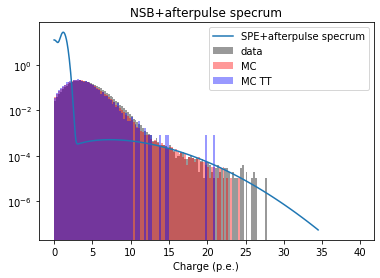

In [21]:

n,b,p = plt.hist(aftp_Q_data, bins=np.arange(0,40,0.25), \
                 color='black', alpha=.4,density=1, label = 'data') 
n,b,p = plt.hist(aftp_Q_MC, bins=np.arange(0,40,0.25), \
                 color='red'  , alpha=.4,density=1, label = 'MC')

n,b,p = plt.hist(aftp_Q_myMC, bins=np.arange(0,40,0.25), \
                 color='blue'  , alpha=.4,density=1, label = 'MC TT')

#n,b,p = plt.hist((rn_wfs_MC.max(axis=2)/11).flatten(),bins=np.arange(0,40,0.25), \
#         color='green'  , alpha=.4,density=1, label = 'MC (amplitude=10)')
        
plt.gca().set_yscale('log')
plt.gca().set_xlabel('Charge (p.e.)')
plt.gca().set_title('NSB+afterpulse specrum')
from astropy.io import ascii
fff ='./spe_afterpulse_pdf_NectarCam_14032019.dat'
aaa = ascii.read(fff)
plt.plot(aaa['col1'],aaa['col3']*60*.5,label='SPE+afterpulse specrum')
l=plt.gca().legend()

In [22]:
rn_wfs_data.min()
#np.where(rn_wfs_data==-251.076)
#np.where(all_wfs_data==0)

-92.80980980980982

In [23]:
#evtX = all_wfs_data[2170]
#aa = plt.plot(evtX.T,color="black",alpha=.05)

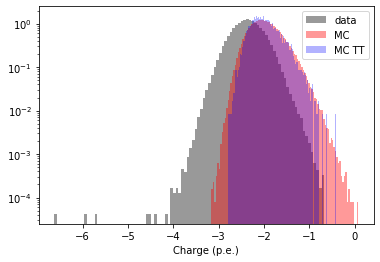

In [24]:
        n,b,p = plt.hist((rn_wfs_data.min(axis=2)/14).flatten(),100, \
                 color='black', alpha=.4,density=1, label = 'data') 
        n,b,p = plt.hist((rn_wfs_MC.min(axis=2)/14).flatten(),100, \
                 color='red'  , alpha=.4,density=1, label = 'MC')
        
        n,b,p = plt.hist((rn_wfs_myMC.min(axis=1)/14).flatten(),100, \
                 color='blue'  , alpha=.3,density=1, label = 'MC TT')
        plt.gca().set_yscale('log')
        plt.gca().set_xlabel('Charge (p.e.)')
        l=plt.gca().legend()

In [25]:
rn_wfs_MC[:,:,:60].sum(axis=1).shape


(1000, 60)

In [26]:
        MC_file_path0 ='/media/ttaverni/Transcend/MC_s/Heide/nsb0_thrs0_new_notes.simtel.gz'
        inputfile_reader = event_source(
            input_url = MC_file_path0,
            max_events=500)

        all_wfs = []
        for ii, event in enumerate(inputfile_reader):
            all_wfs.append(event.r0.tel[1].waveform[0])
        wfs_MC0 = np.array(all_wfs)

In [27]:
        ## NSB = 0 : 
        data_file_path0 = '/media/ttaverni/Transcend/data/dataR1/NectarCAM.Run1533.0000.fits.fz'
        
        inputfile_reader = NectarCAMEventSource(
            input_url = data_file_path0,
            max_events=5000)

        cfg = inputfile_reader.camera_config
        pix_ids = cfg.expected_pixels_id
        
        all_wfs = []
        for ii, event in enumerate(inputfile_reader):
            all_wfs.append(event.r0.tel[event.r0.tels_with_data[0]].waveform[0,pix_ids])
            if ii > len(wfs_MC)-3 : 
                break
        wfs_data0 = np.array(all_wfs)

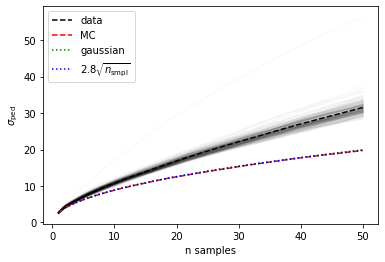

In [28]:
mnf = 50
data_nf = np.array([wfs_data0[:,:pixsmax,10:11+ii].sum(axis=2) for ii in range(mnf)])
MC_nf   = np.array([  wfs_MC0[:,:pixsmax,10:11+ii].sum(axis=2) for ii in range(mnf)])

sdt_1spl    = wfs_data0[:,:pixsmax,:].std(axis=(0,2)).mean()
sdt_1spl_MC =   wfs_MC0[:,:pixsmax,:].std(axis=(0,2)).mean()

wfs_gauss = np.array([ np.array([np.random.normal(250,sdt_1spl_MC,60) for ii in range(200)] ) for wf in wfs_MC])
gauss_nf  = np.array([  wfs_gauss[:,:pixsmax,10:11+ii].sum(axis=2) for ii in range(mnf)])

#plt.plot(range(50),data_nf.std(axis=1),color='black',alpha=.05)
#plt.plot(range(50),  MC_nf.std(axis=1),color='red',  alpha=.05)
smpl_array = np.arange(1,mnf+1,1)

plt.plot(smpl_array ,  data_nf.std(axis=1)              , '-', color='black',  alpha=.02)
plt.plot(smpl_array ,  data_nf.std(axis=1).mean(axis=1) ,'--', color='black',  alpha=1, label='data')
plt.plot(smpl_array ,  MC_nf.std(axis=1).mean(axis=1)   ,'--', color='red'  ,  alpha=1, label='MC')
plt.plot(smpl_array ,  gauss_nf.std(axis=1).mean(axis=1), ':', color='green',  alpha=1, label='gaussian')
plt.plot(smpl_array ,  sdt_1spl_MC * smpl_array**.5     , ':', color='blue' ,  alpha=1 , \
         label = '$2.8 \sqrt{n_\mathrm{smpl}}$')

#plt.plot(smpl_array ,  sdt_1spl * smpl_array**.5, '-.'    , color='blue' ,  alpha=1 , \
#         label = '$15.8 \sqrt{n_\mathrm{smpl}}$')
plt.gca().set_xlabel('n samples')
plt.gca().set_ylabel('$\sigma_\mathrm{ped}$')
l = plt.legend()